 # Import Library

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

# Create Path

In [2]:
path = r'C:\Users\james\Anaconda\Instacart Basket Analysis'

In [3]:
# import dataframe

instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Original data' , 'orders_products_customers_merged.pkl'))

# convert data type for the analysis

instacart = instacart.astype({'age':'int16', 'n_dependants':'int16'})

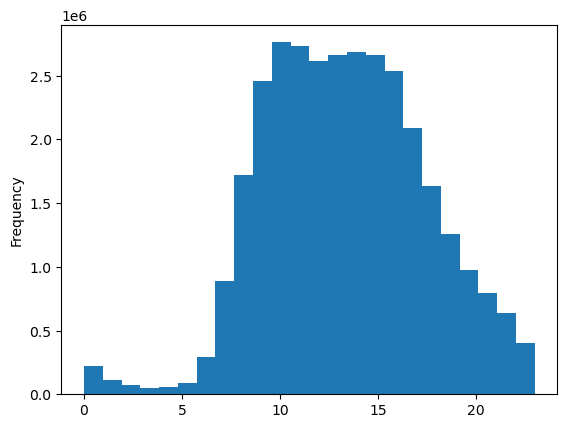

In [4]:
# create a histogram

hist = instacart['order_hour_of_day'].plot.hist(bins = 24)

# Observation
The histogram above displays the frequency when an order was placed at the certain hour of the day. An evenly distributed histogram indicates the orders are placed throughout the day not at the particular hours. Above is a skewed histogram peaks at certain hours of the day and it shows that customers prefer to place orders somewhere between 10 o'clock in the morning and 3 o'clock in the afternoon around the lunch break or before they finish work. The skewed demonstration indicates that customers have the tendency to shop at specific times, such as during the day or in the evening.

Text(0, 0.5, 'frequency_counts')

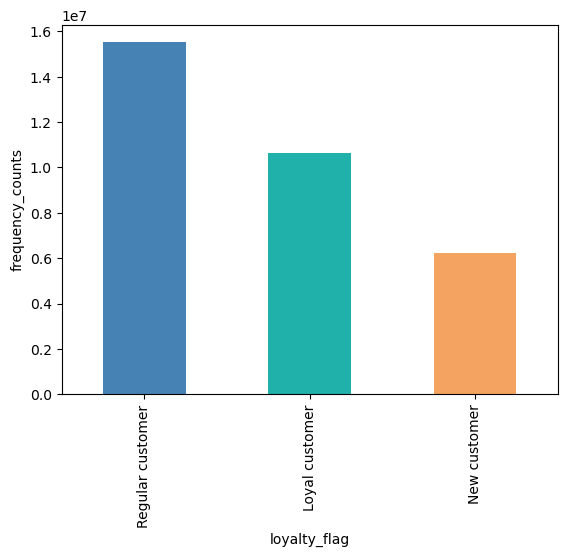

In [5]:
# create a bar chart with chronical color

color = ['steelblue','lightseagreen','sandybrown']

bar = instacart['loyalty_flag'].value_counts().plot.bar(color = color)

plt.xlabel('loyalty_flag')

plt.ylabel('frequency_counts')

# Observation
The bar chart indicates that the majority of the customer base is regular customer rather than loyal customer while the new customer represets the minority. It could offer the marketing team insights in terms of loyalty among our customer base.

In [6]:
pd.options.display.max_columns= None
instacart.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_the_day,max_order,loyalty_flag,avg_order_price,spending_flag,median_of_regularity,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.000000,Mid-range product,Regularly busy,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.500000,Mid-range product,Regularly busy,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.398438,Low-range product,Regularly busy,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.699219,Low-range product,Regularly busy,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.000000,Low-range product,Regularly busy,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
# sampling data to plot a line chart

np.random.seed(4)

In [8]:
# divide the dataframe into 2 parts with equal chance in value

dev = np.random.rand(len(instacart))<= 0.7

In [9]:
# store 70% of the sample in the dataframe big

big = instacart [dev]

In [10]:
# store 30% of the sample in the dataframe small

small = instacart [~dev]

In [11]:
# cross check the output

len(instacart)


32404859

In [12]:
len(big) + len(small)

32404859

In [13]:
# reduce the samples to only the columns needed

instacart_2 = small [['order_hour_of_day','prices']]

In [14]:
# check output

instacart_2.head(4)

,order_hour_of_day,prices
0,8,9.000000
2,8,4.398438
3,8,4.699219
6,7,3.000000


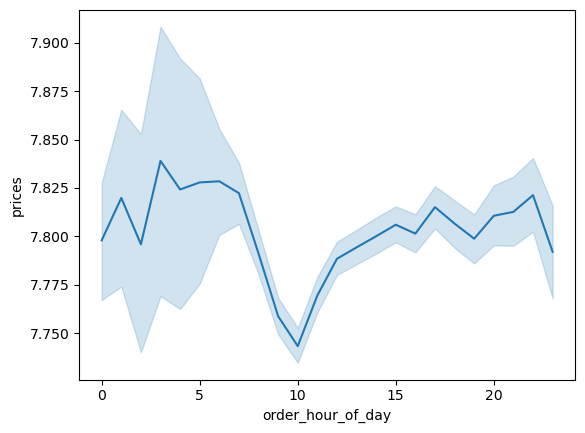

In [15]:
# plot a line chart using the small sample

line = sns.lineplot(data=instacart_2, x = 'order_hour_of_day' , y = 'prices')

# Observation
The line chart plotted above demonstrated that there's no consistent pattern related to prices at a particular hour of day but you can see that from hours 0-5 there is a steady incline in prices but after 5 hours there is a sharp decline all the way to 10 hours. After 10 hours, there is a slow incline and the prices slowly go up once it reaches 15 hours then all the way to 20 hours. 

In [16]:
# reduce the samples to only the columns needed

instacart_3 = small [['age','n_dependants']]

In [17]:
# check output

instacart_3.head(5)

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


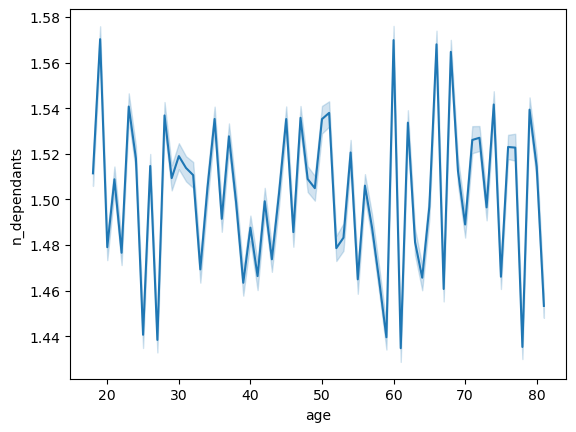

In [18]:
# plot a line chart 

line_2 = sns.lineplot(data=instacart_3, x = 'age' , y ='n_dependants')

# Observation
There's no clear connection between age and number of dependants.

In [19]:
# reduce the samples to only the columns needed

instacart_4 = small [['age' , 'income']]

In [20]:
# check output

instacart_4.head(5)

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


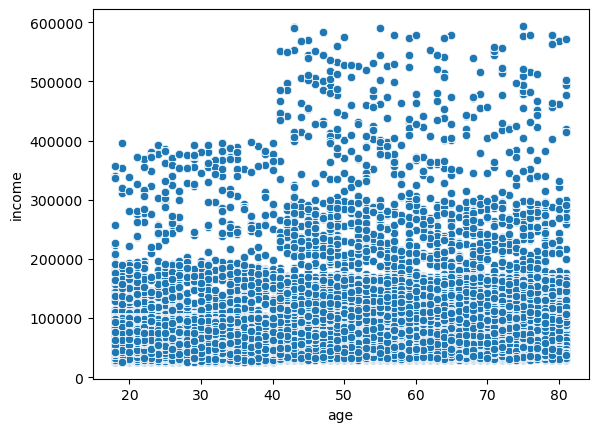

In [21]:
# plot a scatterplot

scatterplot = sns.scatterplot(x = 'age' , y = 'income', data = instacart_4)

# Observation
The scatterplot indicates that there's no connection between age and income (spending power) of a customer.

# Export

In [22]:
# export histogram

hist.figure.savefig(os.path.join(path, '04 Analysis', 'hist_order_hour_of_day.png'))

In [23]:
# export bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'bar_loyalty_status.png'))

In [25]:
# export line chart 1

line.figure.savefig(os.path.join(path, '04 Analysis', 'line_price vs hour_of_day.png'))

In [26]:
# export line chart 2

line_2.figure.savefig(os.path.join(path, '04 Analysis',  'line_2_age_dependants.png'))

In [27]:
# export scatterplot

scatterplot.figure.savefig(os.path.join(path, '04 Analysis',  'scatter_age_income.png'))